In [106]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import os
from time import strptime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model, neighbors, tree, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import warnings  
warnings.filterwarnings('ignore')

In [107]:
df = pd.read_csv("C:/Users/Arjun/Downloads/data_YesBank_StockPrices.csv")
print("Shape of the dataframe is",df.shape)
df.head()

Shape of the dataframe is (185, 5)


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### EDA (Explotory Data Analysis) 

In [109]:
len(df[df.duplicated()])

0

In [110]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [111]:
df[["Month","Year"]] = df["Date"].str.split("-",expand=True)
df = df.drop(["Date"],axis=1)
df.head(2)

,Open,High,Low,Close,Month,Year
0,13.00,14.00,11.25,12.46,Jul,05
1,12.58,14.88,12.55,13.42,Aug,05


In [112]:
df["Month"] = df["Month"].apply(lambda x: strptime(x,'%b').tm_mon)
df.head(2)

,Open,High,Low,Close,Month,Year
0,13.00,14.00,11.25,12.46,7,05
1,12.58,14.88,12.55,13.42,8,05


In [113]:
cols = list(df.columns)
a, b = cols.index('Close'), cols.index('Year')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]
df.head(2)

,Open,High,Low,Year,Month,Close
0,13.00,14.00,11.25,05,7,12.46
1,12.58,14.88,12.55,05,8,13.42


In [114]:
df["Year"] = df["Year"].apply(lambda x: x).astype(int)

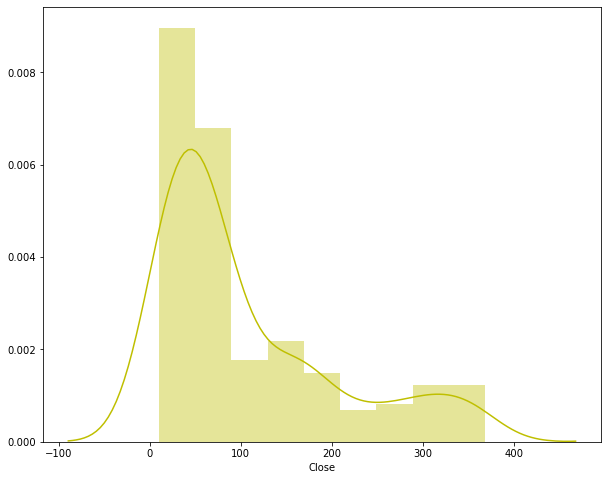

In [115]:
plt.figure(figsize=(10,8))
sns.distplot(df['Close'],color="y")

In [116]:
columns = df.describe().columns
columns

Index(['Open', 'High', 'Low', 'Year', 'Month', 'Close'], dtype='object')

In [117]:
df_new=df.copy()


In [118]:
df_new.describe()

,Open,High,Low,Year,Month,Close
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,12.702703,6.567568,105.204703
std,98.879850,106.333497,91.219415,4.471315,3.446332,98.583153
min,10.000000,11.240000,5.550000,5.000000,1.000000,9.980000
25%,33.800000,36.140000,28.510000,9.000000,4.000000,33.450000
50%,62.980000,72.550000,58.000000,13.000000,7.000000,62.540000
75%,153.000000,169.190000,138.350000,17.000000,10.000000,153.300000
max,369.950000,404.000000,345.500000,20.000000,12.000000,367.900000


In [119]:
def outlier_detection(x):
    plt.figure(figsize = (10,6))
    sns.boxplot(x=x)

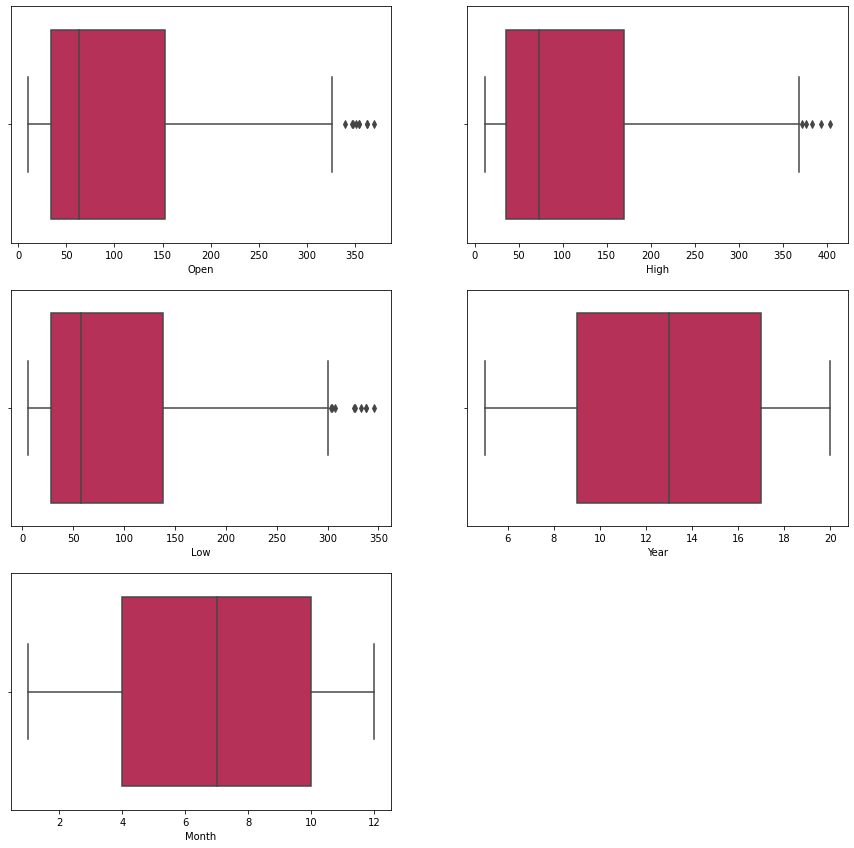

In [120]:
count=1
plt.subplots(figsize=(15, 20))
for i in columns[:-1]:
    ax=plt.subplot(4,2,count)
    sns.boxplot(x=df[i],ax=ax,palette="rocket")

    count+=1
    

plt.show()

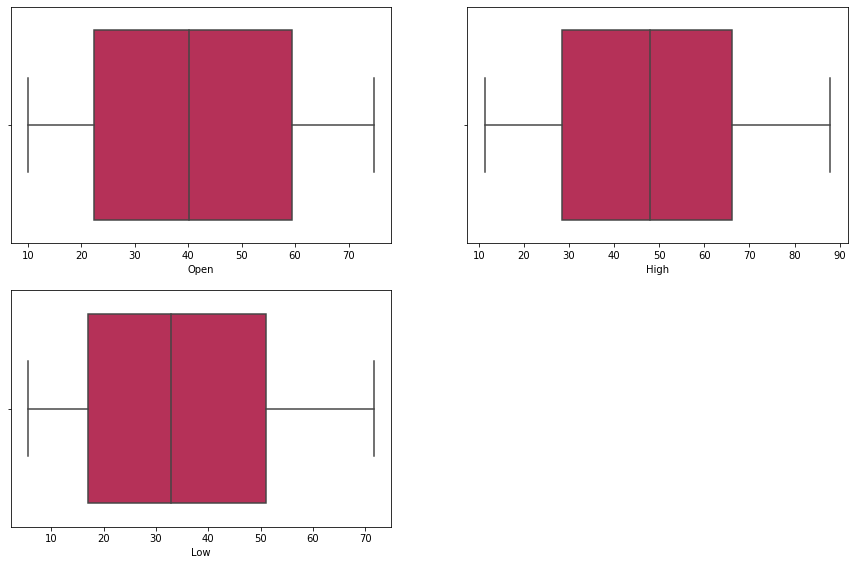

In [121]:
plt.subplots(figsize=(15, 20))

a = np.where(df_new["Open"]>75)
df_new.drop(a[0], inplace = True)
df_new = df_new.reset_index(drop=True)
ax=plt.subplot(4,2,1)
sns.boxplot(x=df_new["Open"],ax=ax,palette="rocket")


a = np.where(df_new["High"]>350)
df_new.drop(a[0], inplace = True)
df_new = df_new.reset_index(drop=True)
ax=plt.subplot(4,2,2)
sns.boxplot(x=df_new["High"],ax=ax,palette="rocket")


a = np.where(df_new["Low"]>300)
df_new.drop(a[0], inplace = True)
df_new = df_new.reset_index(drop=True)
ax=plt.subplot(4,2,3)
sns.boxplot(x=df_new["Low"],ax=ax,palette="rocket")

In [122]:
df_new.shape

(110, 6)

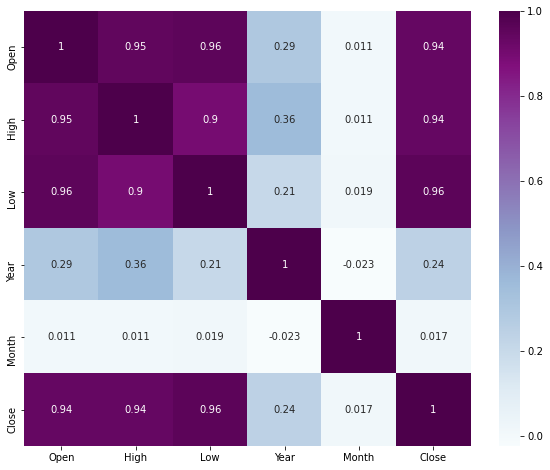

In [123]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(), annot=True, cmap="BuPu")
plt.savefig('heatmap.jpg')

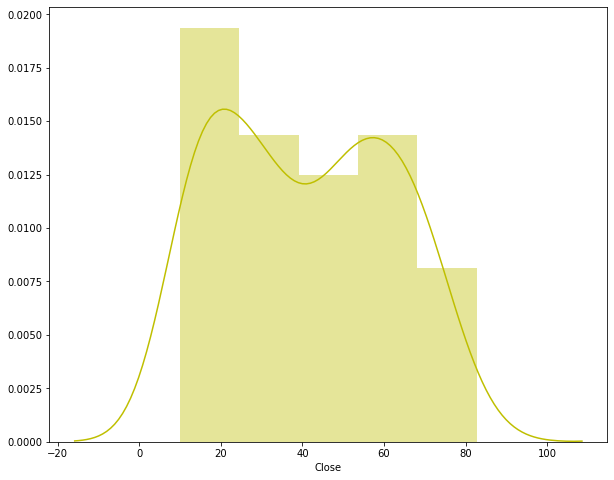

In [124]:
plt.figure(figsize=(10,8))
sns.distplot(df_new['Close'],color="y")

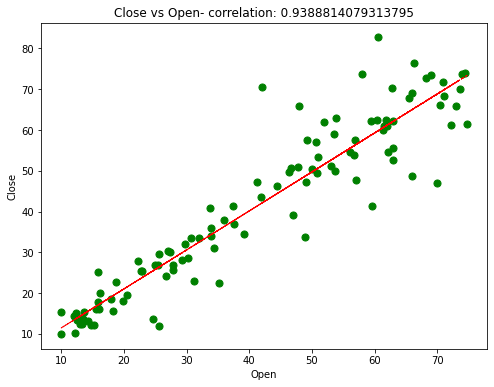

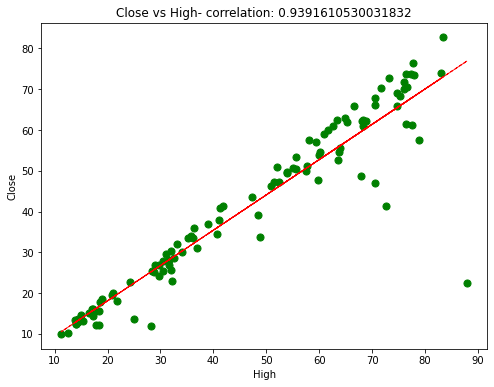

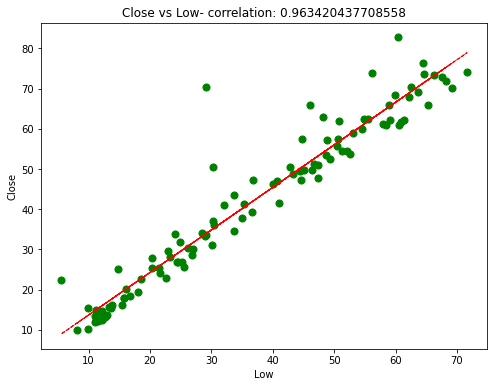

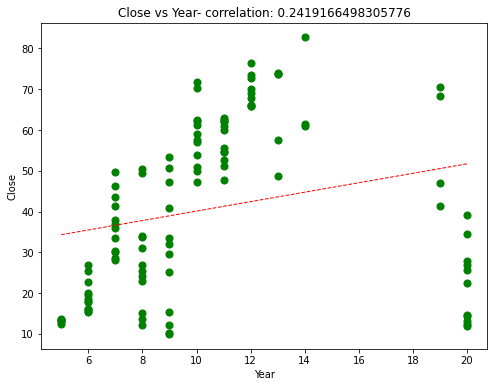

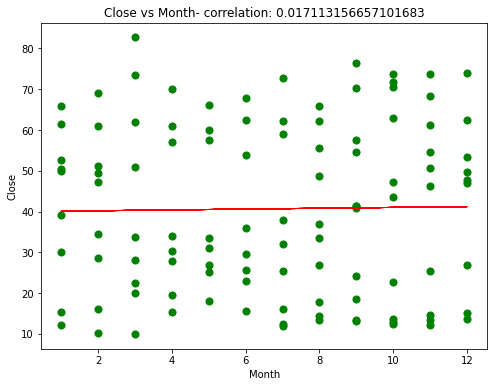

In [125]:
for col in columns[:-1]:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca()
    
    feature = df_new[col]
    
    label = df_new['Close']
    
    correlation = feature.corr(label)
    
    plt.scatter(x=feature, y=label, s=50, color = "g",)
    
    plt.xlabel(col)
    
    plt.ylabel('Close')
    
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    
    z = np.polyfit(df_new[col], df_new['Close'], 1)
    
    y_hat = np.poly1d(z)(df_new[col])

    plt.plot(df_new[col], y_hat, "r--", lw=1)

plt.show()

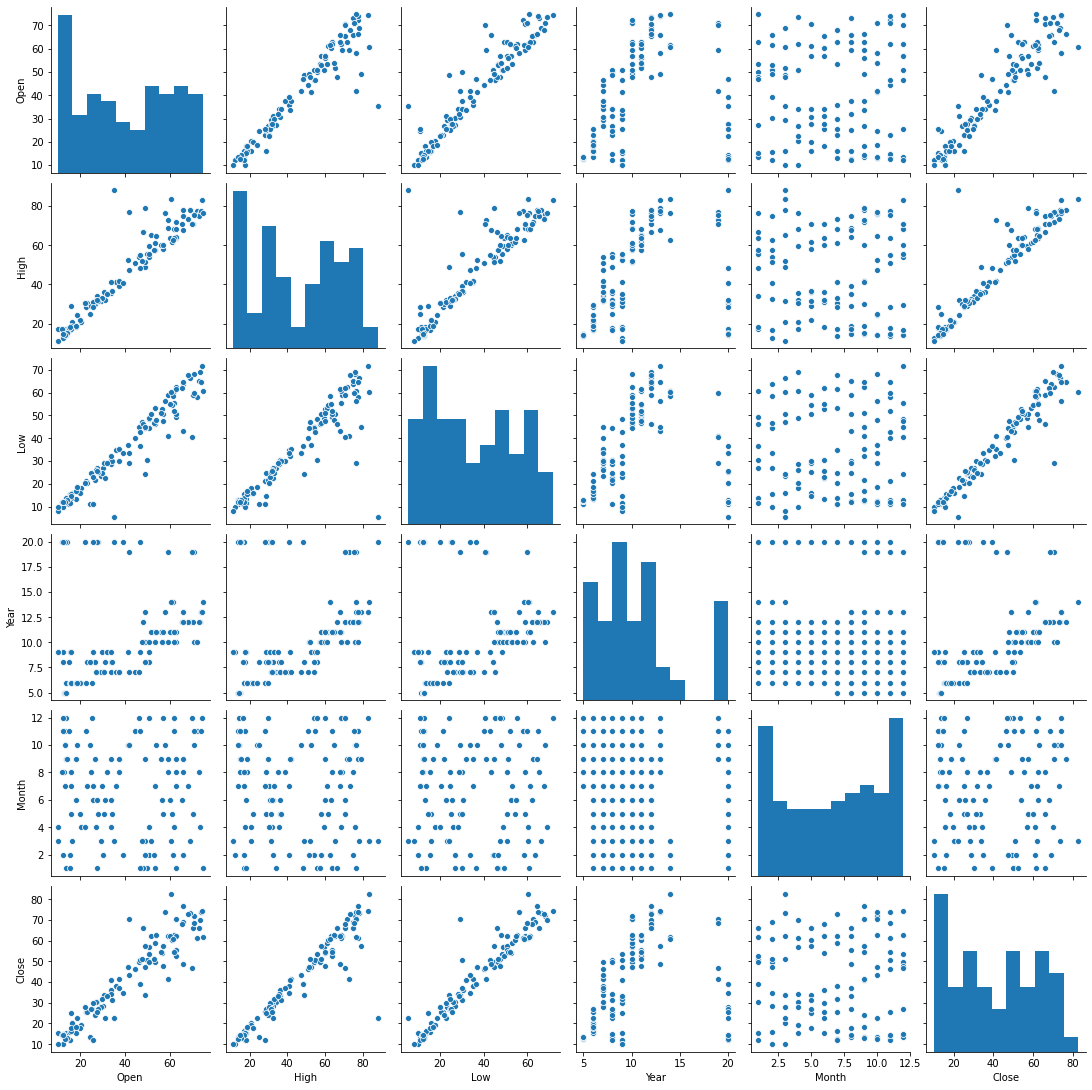

In [126]:
sns.pairplot(df_new)

In [127]:
X = df_new.drop(["Close"],axis=1)
y = df_new["Close"]

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=2)

In [129]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### LINEAR REGRESSION

In [130]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [131]:
y_pred_train = model.predict(X_train_scaled)

In [132]:
y_pred = model.predict(X_test_scaled)

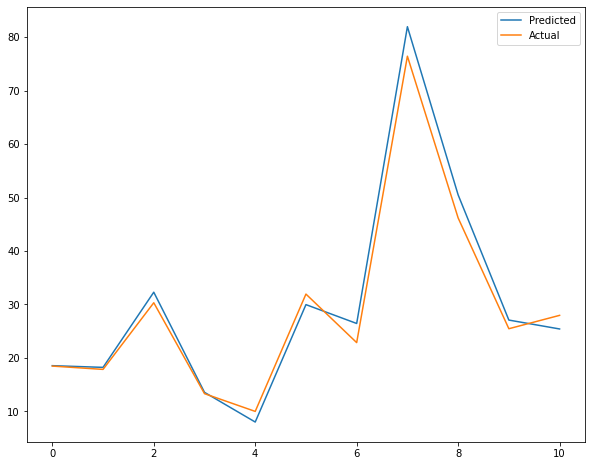

In [133]:
plt.figure(figsize=(10,8))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [134]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Intercept is ",round(model.intercept_,2))
print("Coefficient is is ",model.coef_)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("Root Mean square error of Training data is",round(math.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("Root Mean square error of Testing data is",round(math.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 square of Testing data is",round(R2_train,2))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((X_train_scaled.shape[0]-1)/(X_train_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))

Intercept is  8.59
Coefficient is is  [-2.73965361e+01  4.22136497e+01  5.96069636e+01 -2.24565441e+00
 -6.31584973e-03]
Mean square error of the linear regression model is 7.54
Root Mean square error of Training data is 3.97
Root Mean square error of Testing data is 2.75
R2 square of Testing data is 0.96
R2 square Testing data is 0.98
Adjusted R2 for training :  0.96
Adjusted R2 for testing :  0.95


### SUPPORT VECTOR REGRESSION (SVR)

In [135]:
model = svm.SVR()
model.fit(X_train_scaled,y_train)

SVR()

In [136]:
y_pred_train = model.predict(X_train_scaled)

In [137]:
y_pred = model.predict(X_test_scaled)

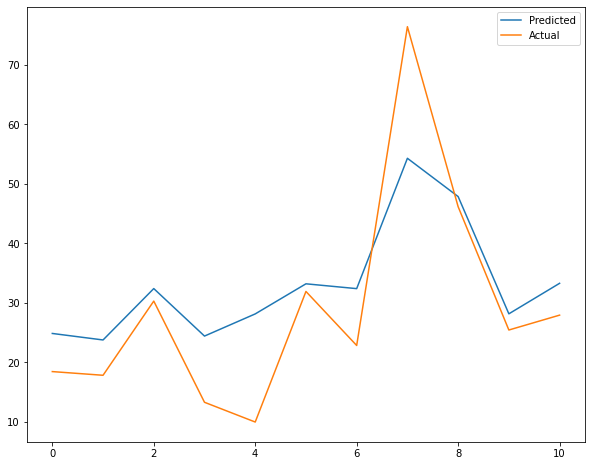

In [138]:
plt.figure(figsize=(10,8))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [139]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("Root Mean square error of Training data is",round(math.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("Root Mean square error of Testing data is",round(math.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 square of Training data is",round(R2_train,2))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((X_train_scaled.shape[0]-1)/(X_train_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))

Mean square error of the linear regression model is 105.12
Root Mean square error of Training data is 9.98
Root Mean square error of Testing data is 10.25
R2 square of Training data is 0.76
R2 square Testing data is 0.66
Adjusted R2 for training :  0.75
Adjusted R2 for testing :  0.33


## Hyperparameter tuning for SVR

In [140]:
SVR = svm.SVR()
SVR.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [141]:
SVR = svm.SVR()
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                 }

SVR_regressor = GridSearchCV(SVR, parameters, scoring='neg_mean_squared_error', cv=3)
SVR_regressor.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [142]:
print("The best fit alpha value is found out to be :" ,SVR_regressor.best_params_)
print("\nUsing ",SVR_regressor.best_params_, " the negative mean squared error is: ", SVR_regressor.best_score_)

The best fit alpha value is found out to be : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Using  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}  the negative mean squared error is:  -26.830912161037162


In [143]:
y_pred_train = SVR_regressor.predict(X_train_scaled)
y_pred = SVR_regressor.predict(X_test_scaled)
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("Root Mean square error of Training data is",round(math.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("Root Mean square error of Testing data is",round(math.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 square of Training data is",round(R2_train,3))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((X_train_scaled.shape[0]-1)/(X_train_scaled.shape[0]-X_test_scaled.shape[1]-1)),3))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))

Mean square error of the linear regression model is 7.87
Root Mean square error of Training data is 4.35
Root Mean square error of Testing data is 2.81
R2 square of Training data is 0.955
R2 square Testing data is 0.97
Adjusted R2 for training :  0.953
Adjusted R2 for testing :  0.95


### DECISION TREE REGRESSOR

In [144]:
model = tree.DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)
model.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)

In [145]:
tree = tree.DecisionTreeRegressor()
tree.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [146]:
y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

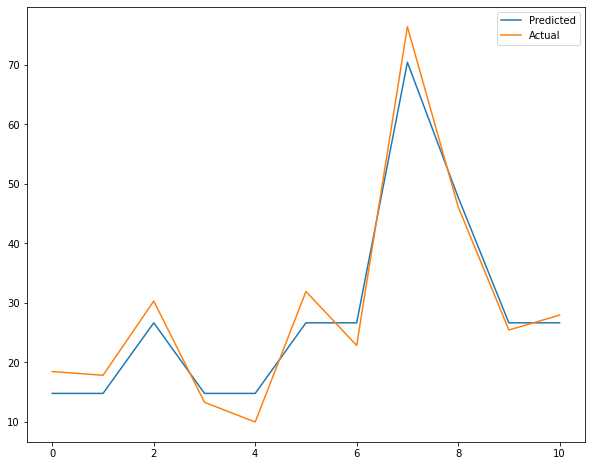

In [147]:
plt.figure(figsize=(10,8))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [148]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("Root Mean square error of Training data is",round(math.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("Root Mean square error of Testing data is",round(math.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 square of Training data is",round(R2_train,3))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((X_train_scaled.shape[0]-1)/(X_train_scaled.shape[0]-X_test_scaled.shape[1]-1)),3))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))

Mean square error of the linear regression model is 13.21
Root Mean square error of Training data is 3.27
Root Mean square error of Testing data is 3.63
R2 square of Training data is 0.975
R2 square Testing data is 0.96
Adjusted R2 for training :  0.973
Adjusted R2 for testing :  0.92


## Hyperparameter Tuning for Decision Tree Regressor

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, neighbors, tree, ensemble
Tree = tree.DecisionTreeRegressor()
parameters = {'max_leaf_nodes': [i for i in range (20)],
             'random_state': [i for i in range (20)],
              'max_depth'    : [4,6,8,10],
             'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson']}

Tree_regressor = GridSearchCV(Tree, parameters, scoring='neg_mean_squared_error', cv=3)
Tree_regressor.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [4, 6, 8, 10],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                            11, 12, 13, 14, 15, 16, 17, 18,
                                            19],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='neg_mean_squared_error')

In [150]:
print("The best fit alpha value is found out to be :" ,Tree_regressor.best_params_)
print("\nUsing ",Tree_regressor.best_params_, " the negative mean squared error is: ", Tree_regressor.best_score_)

The best fit alpha value is found out to be : {'criterion': 'friedman_mse', 'max_depth': 8, 'max_leaf_nodes': 18, 'random_state': 10}

Using  {'criterion': 'friedman_mse', 'max_depth': 8, 'max_leaf_nodes': 18, 'random_state': 10}  the negative mean squared error is:  -35.12443572454132


In [151]:
# model = tree.DecisionTreeRegressor(criterion = "mae", max_leaf_nodes=7, random_state=3)
# model.fit(X_train_scaled,y_train)

In [152]:
y_pred_train = Tree_regressor.predict(X_train_scaled)
y_pred = Tree_regressor.predict(X_test_scaled)

In [153]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("Root Mean square error of Training data is",round(math.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("Root Mean square error of Testing data is",round(math.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 square of Training data is",round(R2_train,3))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((X_train_scaled.shape[0]-1)/(X_train_scaled.shape[0]-X_test_scaled.shape[1]-1)),3))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))

Mean square error of the linear regression model is 12.55
Root Mean square error of Training data is 1.88
Root Mean square error of Testing data is 3.54
R2 square of Training data is 0.992
R2 square Testing data is 0.96
Adjusted R2 for training :  0.991
Adjusted R2 for testing :  0.92


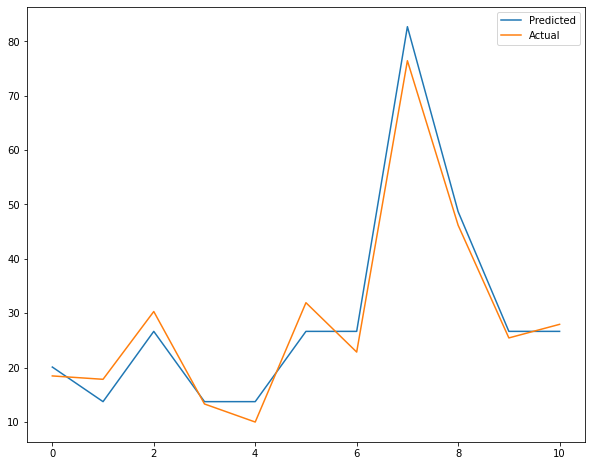

In [154]:
plt.figure(figsize=(10,8))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### RANDOM FOREST REGRESSION

In [155]:
model = ensemble.RandomForestRegressor()
model.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [156]:
y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

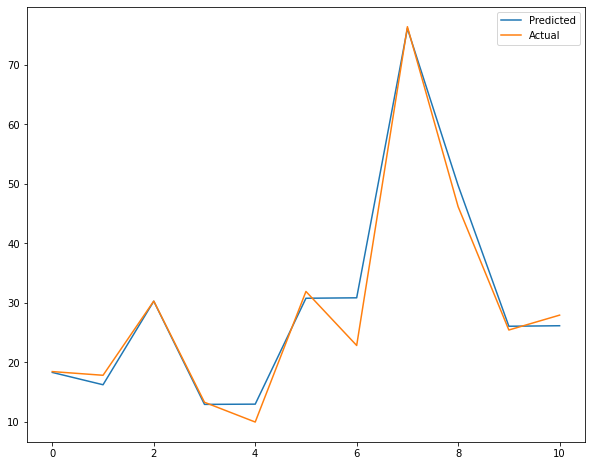

In [157]:
plt.figure(figsize=(10,8))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [158]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("Root Mean square error of Training data is",round(math.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("Root Mean square error of Testing data is",round(math.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 square of Training data is",round(R2_train,2))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((X_train_scaled.shape[0]-1)/(X_train_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))

Mean square error of the linear regression model is 8.51
Root Mean square error of Training data is 2.52
Root Mean square error of Testing data is 2.92
R2 square of Training data is 0.98
R2 square Testing data is 0.97
Adjusted R2 for training :  0.98
Adjusted R2 for testing :  0.95


### GRADIENT BOOSTING REGRESSION

In [159]:
model = ensemble.GradientBoostingRegressor()
model.fit(X_train_scaled,y_train)

GradientBoostingRegressor()

In [160]:
y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

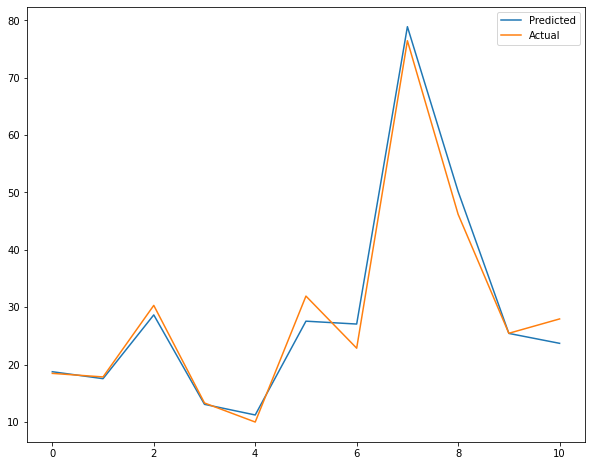

In [161]:
plt.figure(figsize=(10,8))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [162]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("Root Mean square error of Training data is",round(math.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("Root Mean square error of Testing data is",round(math.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 square of Training data is",round(R2_train,3))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((X_train_scaled.shape[0]-1)/(X_train_scaled.shape[0]-X_test_scaled.shape[1]-1)),3))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))

Mean square error of the linear regression model is 7.38
Root Mean square error of Training data is 0.62
Root Mean square error of Testing data is 2.72
R2 square of Training data is 0.999
R2 square Testing data is 0.98
Adjusted R2 for training :  0.999
Adjusted R2 for testing :  0.95


## Hyperparameter Tuning for Gradient Boosting Regression

In [163]:
GB = ensemble.GradientBoostingRegressor()
GB.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [164]:
GB = ensemble.GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample': [0.9, 0.5, 0.2, 0.1],
              'n_estimators': [100,500,1000, 1500],
              'max_depth': [4,6,8,10]
                 }

GB_regressor = GridSearchCV(GB, parameters, scoring='neg_mean_squared_error', cv=3)
GB_regressor.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='neg_mean_squared_error')

In [165]:
print("The best fit alpha value is found out to be :" ,GB_regressor.best_params_)
print("\nUsing ",GB_regressor.best_params_, " the negative mean squared error is: ", GB_regressor.best_score_)

The best fit alpha value is found out to be : {'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.2}

Using  {'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.2}  the negative mean squared error is:  -29.303144310592796


In [166]:
y_pred_train = GB_regressor.predict(X_train_scaled)
y_pred = GB_regressor.predict(X_test_scaled)
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("Root Mean square error of Training data is",round(math.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("Root Mean square error of Testing data is",round(math.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 square of Training data is",round(R2_train,3))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((X_train_scaled.shape[0]-1)/(X_train_scaled.shape[0]-X_test_scaled.shape[1]-1)),3))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))

Mean square error of the linear regression model is 8.92
Root Mean square error of Training data is 2.93
Root Mean square error of Testing data is 2.99
R2 square of Training data is 0.98
R2 square Testing data is 0.97
Adjusted R2 for training :  0.979
Adjusted R2 for testing :  0.94


## REGULARISATION

## Lasso Regressor

In [167]:
from sklearn.linear_model import Lasso
lasso  = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [168]:
y_pred_train = lasso.predict(X_train_scaled)
y_pred = lasso.predict(X_test_scaled)

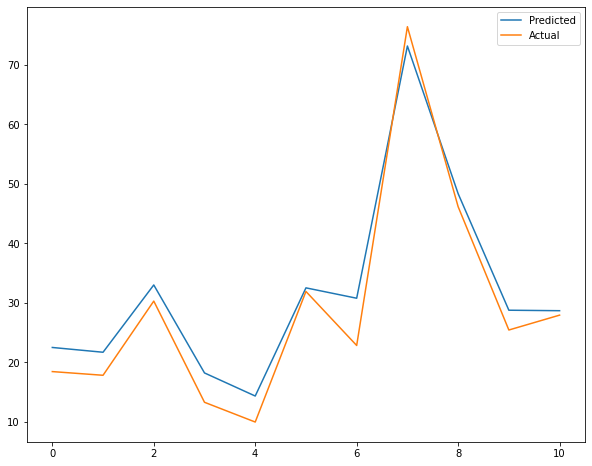

In [169]:
plt.figure(figsize=(10,8))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [170]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("Root Mean square error of Training data is",round(math.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("Root Mean square error of Testing data is",round(math.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 square of Training data is",round(R2_train,3))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((X_train_scaled.shape[0]-1)/(X_train_scaled.shape[0]-X_test_scaled.shape[1]-1)),3))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))

Mean square error of the linear regression model is 15.7
Root Mean square error of Training data is 5.68
Root Mean square error of Testing data is 3.96
R2 square of Training data is 0.924
R2 square Testing data is 0.95
Adjusted R2 for training :  0.92
Adjusted R2 for testing :  0.9


### Running GridSearchCV cross validation on Lasso Regressor

In [171]:
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [172]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -35.513443462773886


In [173]:
y_pred_train = lasso_regressor.predict(X_train_scaled)
y_pred = lasso_regressor.predict(X_test_scaled)

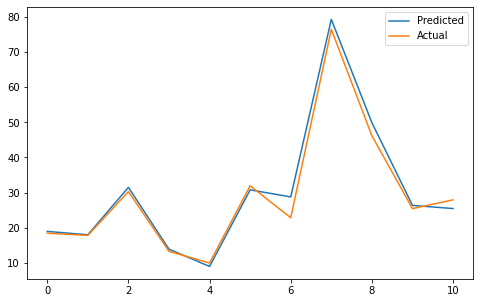

In [174]:
plt.figure(figsize=(8,5))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [175]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("Root Mean square error of Training data is",round(math.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("Root Mean square error of Testing data is",round(math.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 square of Training data is",round(R2_train,3))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((X_train_scaled.shape[0]-1)/(X_train_scaled.shape[0]-X_test_scaled.shape[1]-1)),3))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))

Mean square error of the linear regression model is 6.21
Root Mean square error of Training data is 4.41
Root Mean square error of Testing data is 2.49
R2 square of Training data is 0.954
R2 square Testing data is 0.98
Adjusted R2 for training :  0.952
Adjusted R2 for testing :  0.96


## Ridge Regressor

In [176]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)
ridge.fit(X_train_scaled,y_train)

Ridge(alpha=0.1)

In [177]:
y_pred_train = ridge.predict(X_train_scaled)
y_pred = ridge.predict(X_test_scaled)

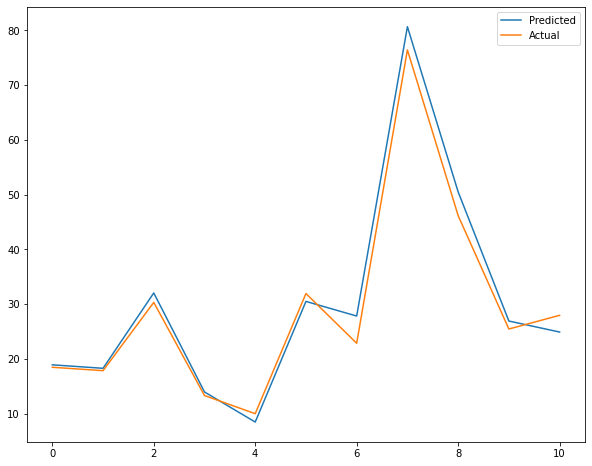

In [178]:
plt.figure(figsize=(10,8))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [179]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("Root Mean square error of Training data is",round(math.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("Root Mean square error of Testing data is",round(math.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 square of Training data is",round(R2_train,3))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((X_train_scaled.shape[0]-1)/(X_train_scaled.shape[0]-X_test_scaled.shape[1]-1)),3))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))

Mean square error of the linear regression model is 7.37
Root Mean square error of Training data is 4.08
Root Mean square error of Testing data is 2.72
R2 square of Training data is 0.961
R2 square Testing data is 0.98
Adjusted R2 for training :  0.959
Adjusted R2 for testing :  0.95


### Running GridSearchCV cross validation on Ridge Regressor

In [180]:
parameters ={'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.5,0.7,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=Ridge(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.5, 0.7, 1, 5, 10, 20, 30,
                                   40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [181]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.5}

Using  {'alpha': 0.5}  the negative mean squared error is:  -31.836551363893808


In [182]:
y_pred_train = ridge_regressor.predict(X_train_scaled)
y_pred = ridge_regressor.predict(X_test_scaled)

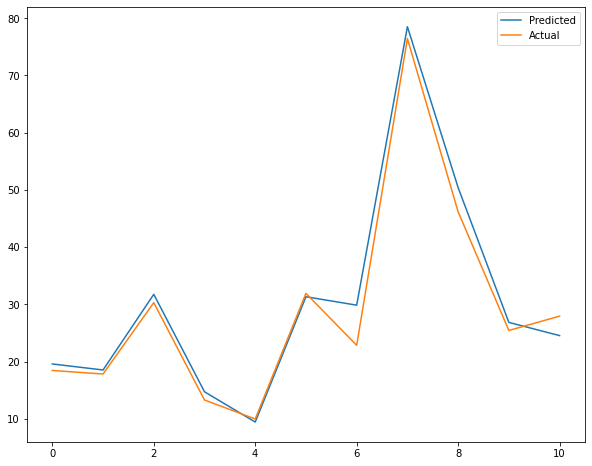

In [183]:
plt.figure(figsize=(10,8))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [184]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("Root Mean square error of Training data is",round(math.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("Root Mean square error of Testing data is",round(math.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 square of Training data is",round(R2_train,3))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((X_train_scaled.shape[0]-1)/(X_train_scaled.shape[0]-X_test_scaled.shape[1]-1)),3))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)),2))

Mean square error of the linear regression model is 8.32
Root Mean square error of Training data is 4.59
Root Mean square error of Testing data is 2.88
R2 square of Training data is 0.95
R2 square Testing data is 0.97
Adjusted R2 for training :  0.948
Adjusted R2 for testing :  0.95
